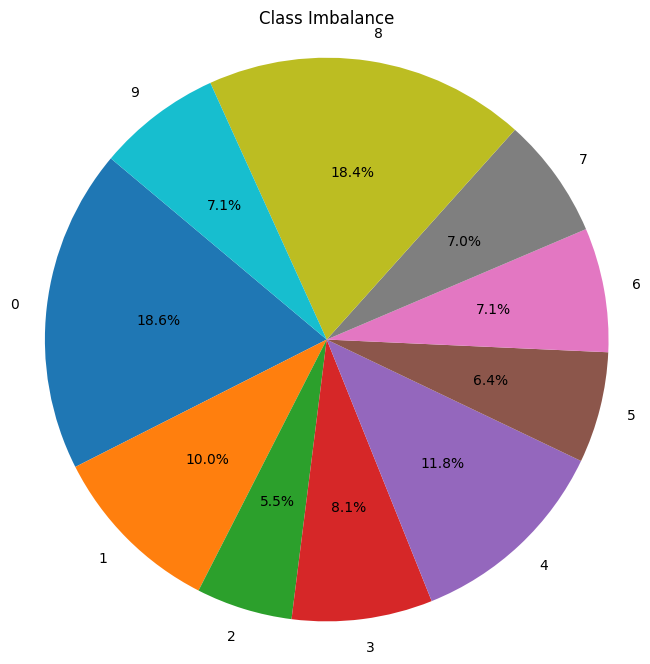

In [ ]:
# @title Class imbalance study
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.load('/content/drive/MyDrive/PRNN/Assignment3/animals10/animals10_data.npz')

# Extract class labels
labels = data['labels']

# Count occurrences of each class
unique_labels, counts = np.unique(labels, return_counts=True)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=unique_labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Imbalance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


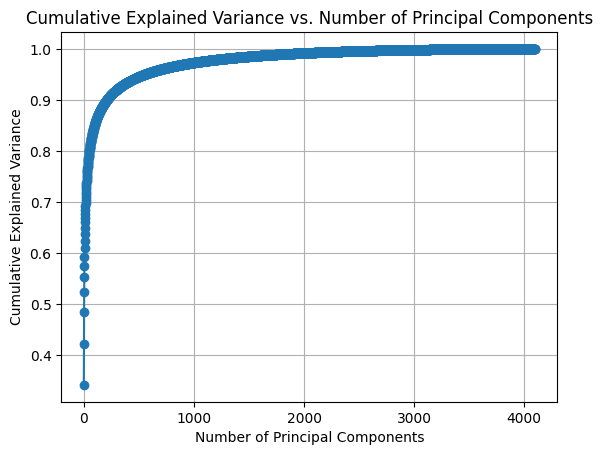

Number of Principal Components to Retain: 551


In [ ]:
# @title PCA
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
data = np.load('/content/drive/MyDrive/PRNN/Assignment3/animals10/animals10_data.npz')
# Load the data from the .npz file
#image_data = np.load('/content/drive/MyDrive/PRNN/Assignment3/animals10/animals10_data.npz')
data_matrix=data['data']
import numpy as np
import matplotlib.pyplot as plt

class PCA:
    def __init__(self, n_components=None, explained_variance_threshold=None):
        self.n_components = n_components
        self.explained_variance_threshold = explained_variance_threshold
        self.mean = None
        self.components = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        # Compute the mean of the data matrix
        self.mean = np.mean(X, axis=0)

        # Center the data matrix
        centered_data_matrix = X - self.mean

        # Compute the covariance matrix
        covariance_matrix = np.cov(centered_data_matrix.T)

        # Compute the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort the eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]

        # Determine the number of principal components to retain
        if self.n_components is None and self.explained_variance_threshold is None:
            self.n_components = X.shape[1]  # Retain all components if neither specified

        if self.n_components is not None:
            if self.n_components > X.shape[1]:
                raise ValueError("Number of components cannot exceed the number of features.")
        else:
            if self.explained_variance_threshold is not None:
                cumulative_explained_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
                self.n_components = np.argmax(cumulative_explained_variance_ratio >= self.explained_variance_threshold) + 1

        # Select the top `n_components` eigenvectors
        self.components = eigenvectors[:, sorted_indices[:self.n_components]]
        self.explained_variance_ratio_ = sorted_eigenvalues / np.sum(sorted_eigenvalues)

    def transform(self, X):
        # Center the data
        centered_data_matrix = X - self.mean

        # Project the data onto the principal components
        reduced_data_matrix = centered_data_matrix @ self.components
        return reduced_data_matrix

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def reconstruct(self, X_reduced):
        # Reconstruct the original data from the reduced data matrix
        reconstructed_data_matrix = X_reduced @ self.components.T + self.mean
        return reconstructed_data_matrix

    def plot_cumulative_explained_variance(self):
        plt.plot(np.cumsum(self.explained_variance_ratio_), marker='o')
        plt.xlabel('Number of Principal Components')
        plt.ylabel('Cumulative Explained Variance Ratio')
        plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
        plt.grid(True)
        plt.show()

pca = PCA(explained_variance_threshold=0.95)

# Fit PCA to the data and transform it
X_reduced = pca.fit_transform(data)

# Plot cumulative explained variance ratio
pca.plot_cumulative_explained_variance()

# Print the number of components retained
print(f"Number of Principal Components Retained: {pca.n_components}")